In [4]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [5]:
with open(f'Step1/dataframes/{3}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.763083e+09,1.763083e+09,"[19.57, 19.8, 19.95, 19.95, 20.03, 20.1, 20.1,...",775,3,1
1,Tag3,Tag2,1.763083e+09,1.763083e+09,"[128.75, 14.99, 14.92, 15.14, 14.76, 14.76, 14...",775,3,1
2,Tag2,Tag1,1.763083e+09,1.763083e+09,"[14.61, 16.82, 15.68, 15.45, 15.22, 15.14, 15....",775,3,1
3,Tag3,Tag1,1.763083e+09,1.763083e+09,"[14.76, 14.31, 14.31, 14.46, 14.31, 14.31, 14....",775,3,1
4,Tag1,Tag3,1.763083e+09,1.763083e+09,"[20.18, 20.18, 20.71, 20.56, 20.41, 20.64, 20....",775,3,1


In [6]:
# #correction only remove later
# corrected_df=pd.DataFrame(columns=["Rx","Tx", "MPP Start Time (s)",
#                             "MPP Stop Time (s)","Voltages (mV)",
#                             "Frequency (MHz)", "Run Exp Num"])

# for idx in range(df.shape[0]):
#     corrected_df=pd.concat([corrected_df,pd.DataFrame([df.iloc[idx][0]])],ignore_index=True)
#     corrected_df=pd.concat([corrected_df,pd.DataFrame([df.iloc[idx][1]])],ignore_index=True)
    

In [15]:
# df=corrected_df
df["NumMPPs"]=5
# df

In [10]:
print(len(df))

138


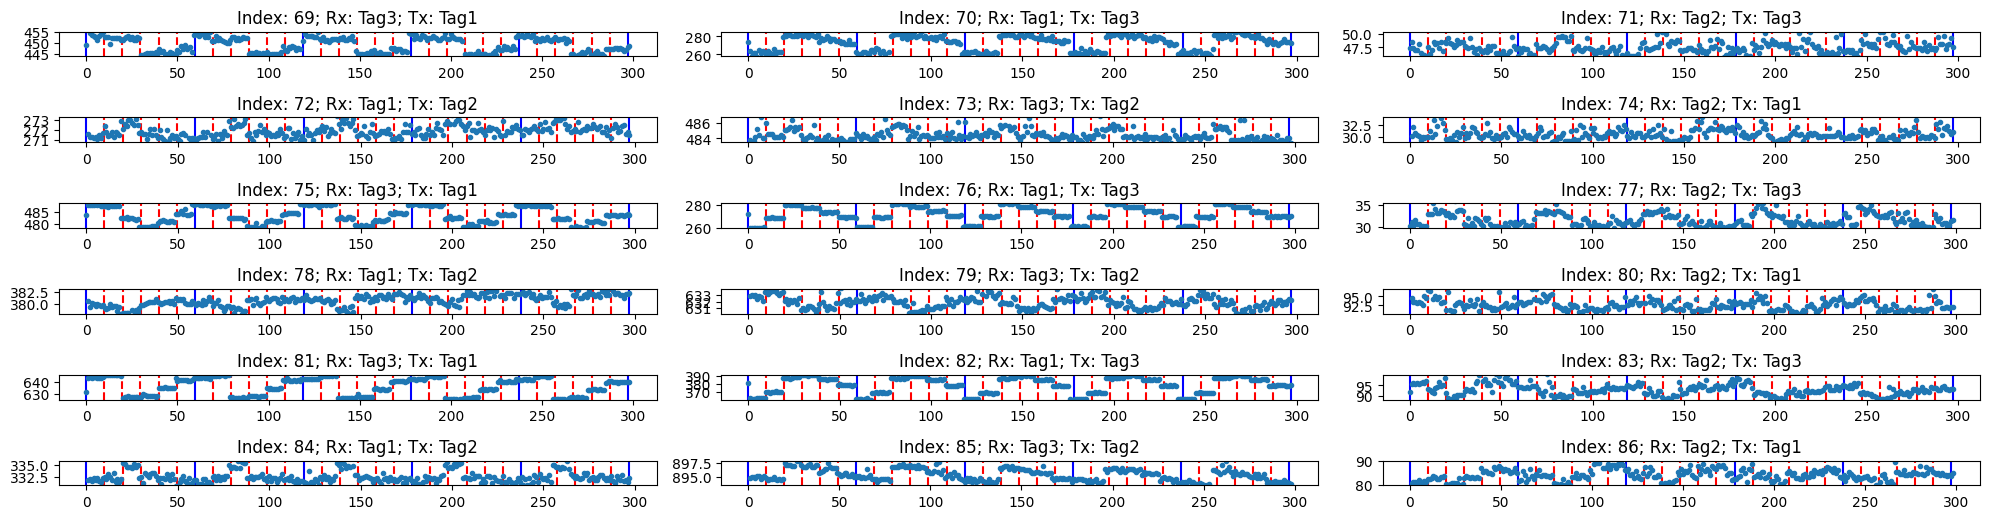

In [16]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=int(df.iloc[0]['NumMPPs'])
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(20,40))
# for df_idx in range(len(df)):
for df_idx in range(69,(69+18)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    # bad=False
    # for k in phase_medians.keys():
    #     assert(len(phase_medians[k])==num_mpps)
    #     if np.std(phase_medians[k])>1:
    #         print(f"Bad data found at {df_idx} df_idx at phase {k}.")
    #         print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.ylim([np.percentile(voltages,1), np.percentile(voltages,99)])
        plt.plot(voltages,'.')
        plt.title(f"Index: {df_idx}; Rx: {df.iloc[df_idx]['Rx']}; Tx: {df.iloc[df_idx]['Tx']}")
        plt.tight_layout()
    # break
        
if plotting:
    plt.show()
    
    

In [9]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[19.57, 19.8, 19.95, 19.95, 20.03, 20.1, 20.1,...",[19.95],[19.87],[19.95],[19.87],[19.87],[19.835],775,3,1
1,Tag3,Tag2,"[128.75, 14.99, 14.92, 15.14, 14.76, 14.76, 14...",[14.92],[14.76],[14.92],[14.8],[14.8],[14.725],775,3,1
2,Tag2,Tag1,"[14.61, 16.82, 15.68, 15.45, 15.22, 15.14, 15....",[15.45],[15.565],[15.260000000000002],[15.260000000000002],[15.6],[15.18],775,3,1
3,Tag3,Tag1,"[14.76, 14.31, 14.31, 14.46, 14.31, 14.31, 14....",[14.38],[14.15],[14.57],[14.61],[14.69],[14.57],775,3,1
4,Tag1,Tag3,"[20.18, 20.18, 20.71, 20.56, 20.41, 20.64, 20....",[20.64],[20.33],[20.065],[20.6],[20.71],[20.6],775,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
133,Tag3,Tag2,"[270.43, 124.4, 124.32, 124.48, 124.17, 124.63...",[124.4],[124.25],[124.66499999999999],[124.63],[124.66499999999999],[124.59],995,3,1
134,Tag2,Tag1,"[38.26, 15.07, 14.46, 14.46, 15.14, 15.83, 15....",[15.07],[15.794999999999998],[14.420000000000002],[14.61],[14.915],[14.57],995,3,1
135,Tag3,Tag1,"[124.48, 127.91, 128.29, 127.99, 128.14, 128.1...",[128.06],[130.01],[125.58000000000001],[124.55],[126.88],[131.19],995,3,1
136,Tag1,Tag3,"[18.27, 20.03, 19.87, 19.72, 19.8, 20.1, 19.87...",[19.87],[20.41],[20.369999999999997],[18.04],[17.85],[18.65],995,3,1
